In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb 
from sklearn.svm import SVC

### Olay

<em>Meme kanseri kadınlarda görülen kanserlerin 1/3 gibi büyük bir bölümünü oluşturan yayhın görülen bir kanser türüdür. İyi ya da kötü huylu olabilir.</em>

### Hedef

<em>Örneklerin kötü(1) ve iyi(0) huylu olarak etiketlendiği veri setini kullanarak, yeni örneklerin iyi huylu mu kötü huylu mu olduğunu tahminleyebiliriz. Bu, sınıflandırma problemidir.</em> 

---

**Veriseti: ile ilgili kısa bir açıklama** 

    1.Column:
    
        Her bir örneğin kendine ait ID'si.

    2.Column:

        M = Malignant | Kötü Huylu - Present (M): Kanser
        B = Benign | İyi Huylu - Absent (B): Kanser değil
    
    3-32 Column:
    
        Görüntülerin sayısallaştırılması ile elde edilen numerik değerler.

Veri setinin yüklenmesi:

In [2]:
import pandas as pd 
data=pd.read_csv('data.csv')
keep_data=data.copy()

# Keşifçi veri analizi ve veri görselleştirme

>Verinin taşıdığı bir bilgi vardır. Bu bilgileri bazı numerik değerlendirmelerinden ziyade, farklı açılaradan görebilmek ve anlamak gerekir. Bunun için ise veriyi doğru şekilde temsiz etmek gerekir. Bunun için, eldeki veriye bodoslama dalmak pek yararlı olmayacaktır. Basit bir veri görselleştirme, diğer bir çok araçtan fazla bilgi getirebilir. 



In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


__.info()__ metodu, toplam satır sayısına, sütunlardaki null olmayan değerlerin sayısına, özelliklerin türüne hızlıca bir bakış için kullanışlıdır:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Buraya bakarak ne düşünmeliyiz?:**
    
    >Tüm özelliklerin(columns) olması gereken tipte olduğunu(bazen kategorik olması gereken özellik numerik olabilir ve bunu düzeltmek gerekir.) görürüz.
    
    >'Unnamed: 32' isminde gereksiz bir özellik var, bundan kurtulmalıyız.
   

In [5]:
# "Unnamed:32" 'yi silelim
data=data.drop(columns=['Unnamed: 32','id'], axis=1)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Özelliklerin dağılımlarında bir anormallik var mı diye dağılımlarına bakmak yararlıdır. 

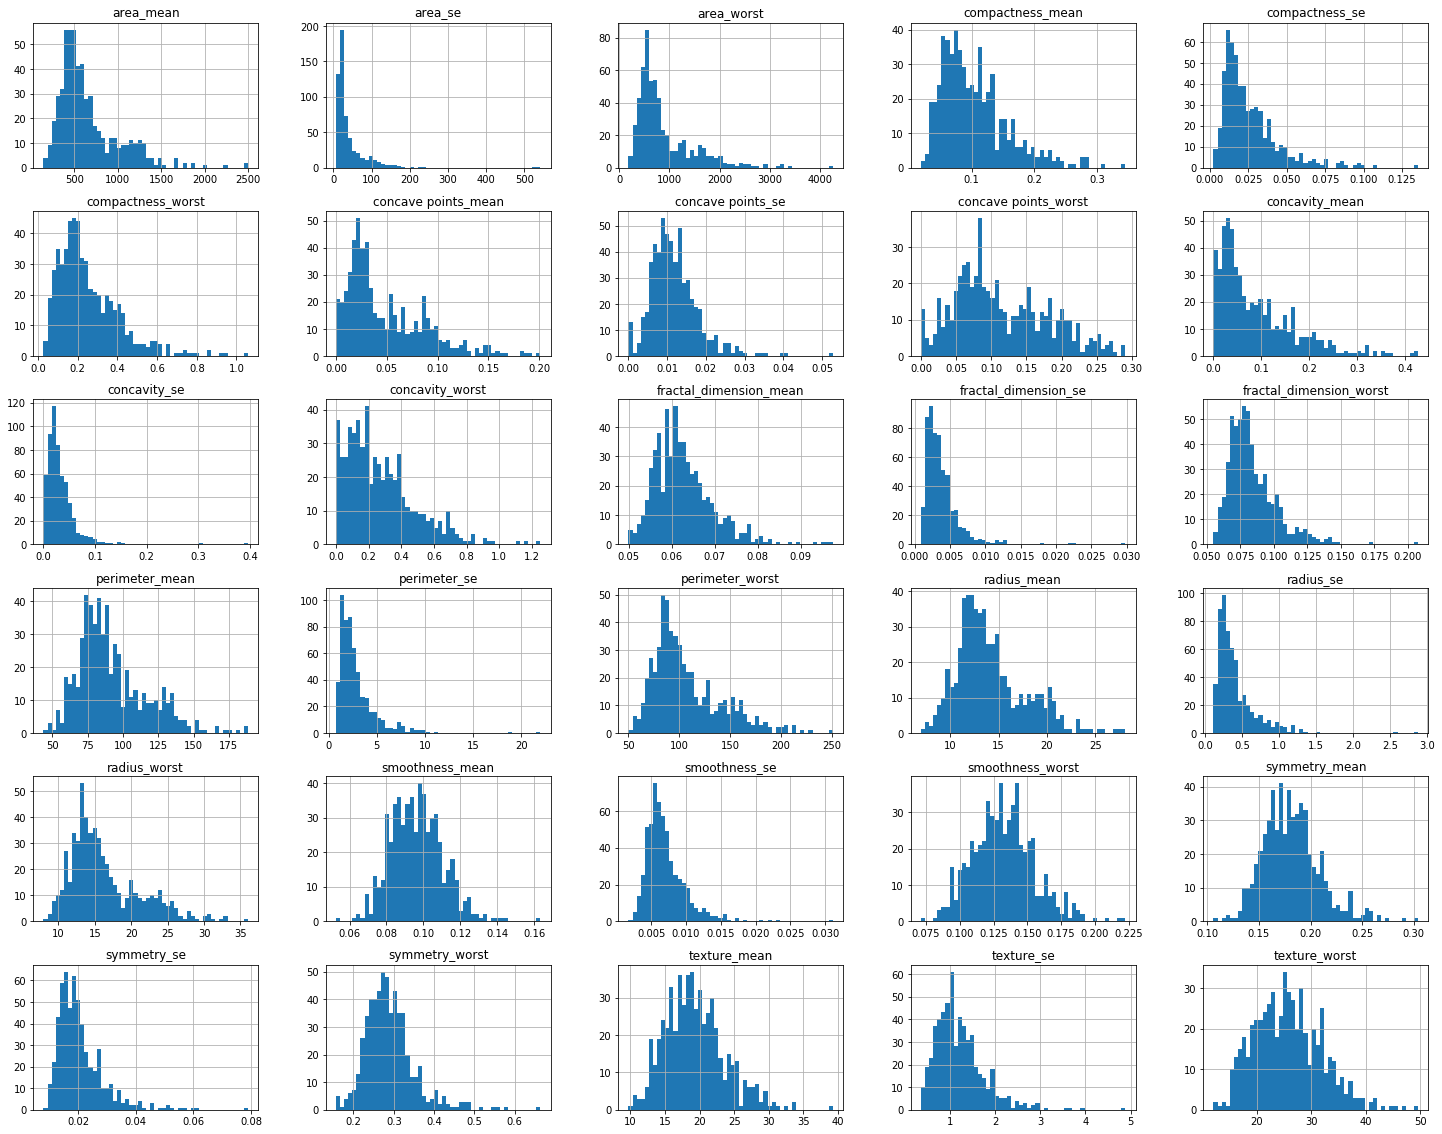

In [203]:
data.drop(columns=['diagnosis']).hist(bins=50, figsize=(25,20)); 

**Peki buradan ne çıkarabiliriz?**
> Genel olarak dağılımların gauss(normal) dağılımına sahip olduğunu görsemde, bazı dağılımlar birarın, __area_se__ gibi, gausstan biraz farklı olduğunu görüyorum. 

>__◾__ "hands-on-machine-learning" kitabında şu söylenir: **"Histogramların kuyruk ağırlıklı olmaları, yani sola kıyasla medyanın sağına daha fazla uzanmaları bazı Makine Öğrenimi algoritmalarının kalıpları algılamasını biraz zorlaştırabilir"** (Sebebini tam olarak bilmiyorum). O yüzden daha sonra bu nitelikleri daha çan şekilli dağılımlara sahip olacak şekilde dönüştürmek denenebilir. Bunu da **standardizasyon** ile yaparız. Standardizasyon, Gauss dağılımına ve farklı ortalamalara ve standart sapmalara sahip öznitelikleri, ortalaması 0 ve standart sapması 1 olan standart bir Gauss dağılımına dönüştürmek için kullanışlıdır.

>Bunun dışında değerlerin büyük ihtimalle ölçeklendirilmiş olduğunu da farkedebiliriz (büyük ihtimalle değerler olduğunun birkaç bin katı daha azı ya da daha fazlasıydı.)

Elimizde 2 farklı sınıf (kanser / kanser değil) olduğu için dağılımların bazıları, büyük ihtimalle, iki sınıf için birbirinden farklı dağılımlar gösterecektir. Özelliklerin dağılımlarının sınıflara göre değişimine bir bakmak hiç fena olmaz. Bunu da şöyle yapabiliriz: 

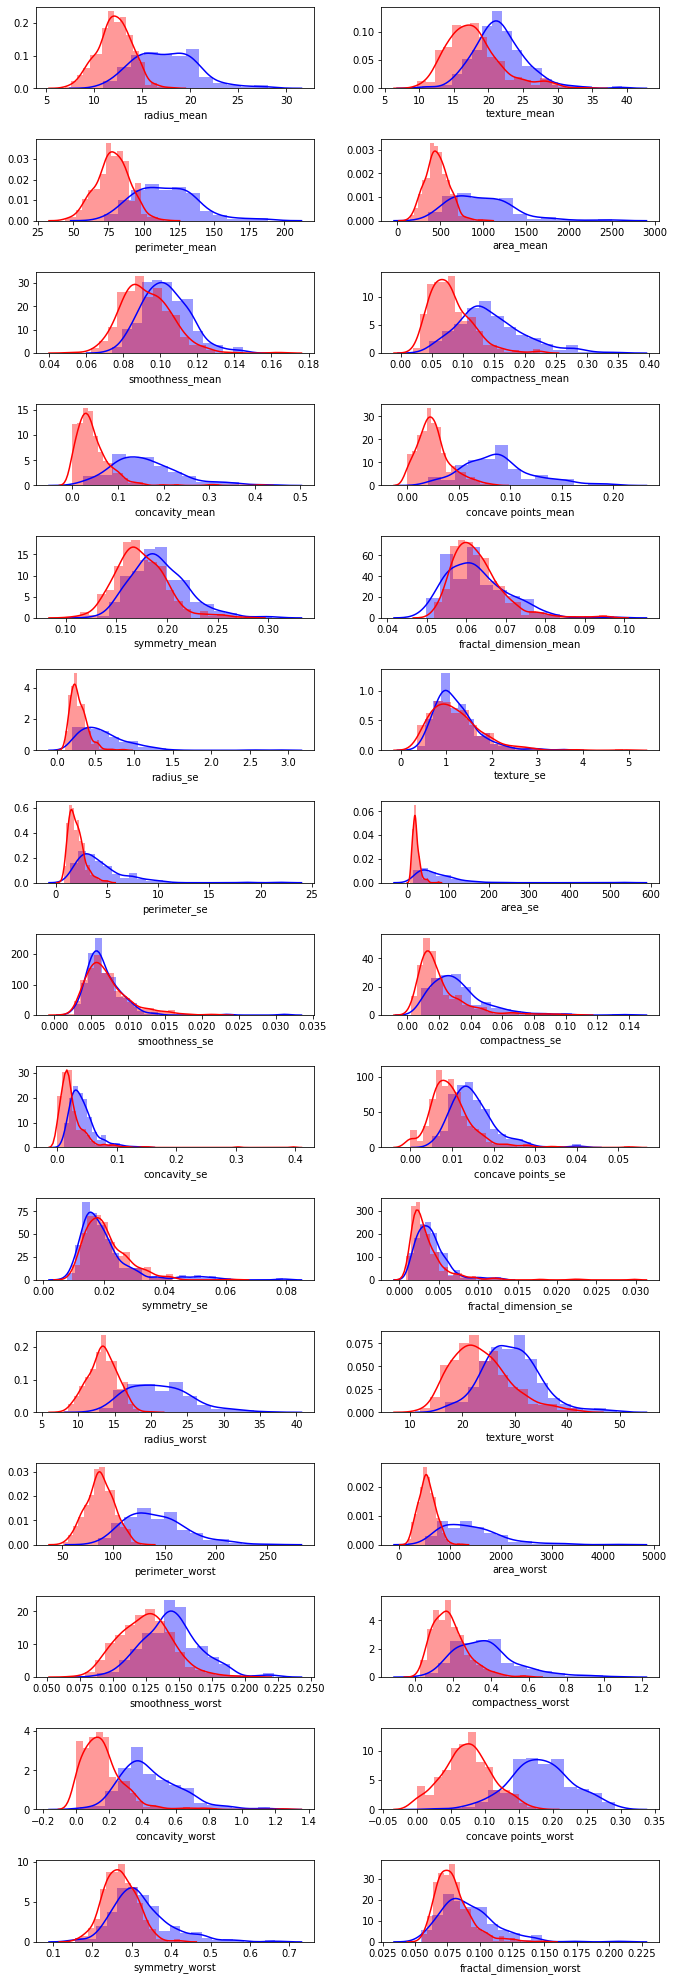

In [204]:
import seaborn as sns, numpy as np
from scipy import stats
import matplotlib.pyplot as plt
fig, axes=plt.subplots(ncols=2, nrows=int(len(data.columns)/2), figsize=(10, 28))
fig.tight_layout(pad = 3.0)

for index,i in enumerate(data.drop(columns='diagnosis').columns):
    data01 = data[data.diagnosis=='M'][str(i)]
    data02 = data[data.diagnosis=='B'][str(i)]
    ax1 = sns.distplot(data01, color = 'blue', ax=axes[int(index/2)][int(index%2)],kde = True)
    ax2 = sns.distplot(data02, color = 'red', ax=axes[int(index/2)][int(index%2)], kde = True)

Görüleceği gibi, bazı özellikler, kanseri ve kanserli omayan hücreler için farklı dağılımlar gösterirken bazı özellikler hemen hemen aynı dağılıma sahip. Farklı dağılım gösteren özellikler kanserli/kanserli olmayan hücreleri belirlemede ayırt edici olabilir. Açıkçası, özelliklerin ne ifade ettiğine tam anlamıyla hakim değilim. Eğer bir hastanede veribilimci oalrak çalışıyor olsaydım, verileri hazırlayan ekip ve doktorlar ile bir görüşme yapardım .)

Az sonra özellikler ve hedef değişken arasındaki korelasyonlara baktığımızda, bu histogram grafiklerinde farklı dağılan özelliklerin yüksek korelasyona sahip olduğunu göreceğiz. Hatta hemen şimdi kısaca bir bakalım:

***Kanserli olup olmama durumunu 1 ve 0 ile ifade edelim:***
>__M: 1 ->__  Kanser

>__B: 0 ->__  Kanser yok

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'] )
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# Özelliklerin kanserli olma olmama durumu ile ilgili korelasyonları: 
corr_matrix = data.corr()
corr_matrix["diagnosis"].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

Eğer çıkıp bu özelliklerin dağılımına bakarsanız, farklı dağılım gösterenlerin, bağımsız değişken ile  genellikle yüksek korelasyona sahip olduklarını görebilirsiniz.

Umut vaad eden özellikleri ele alarak özellikler arası korelasyonları şöyyle de inveleyebiliriz: 

In [207]:
attributes=["concave points_worst","perimeter_worst",
"concave points_mean","radius_worst","perimeter_mean"]

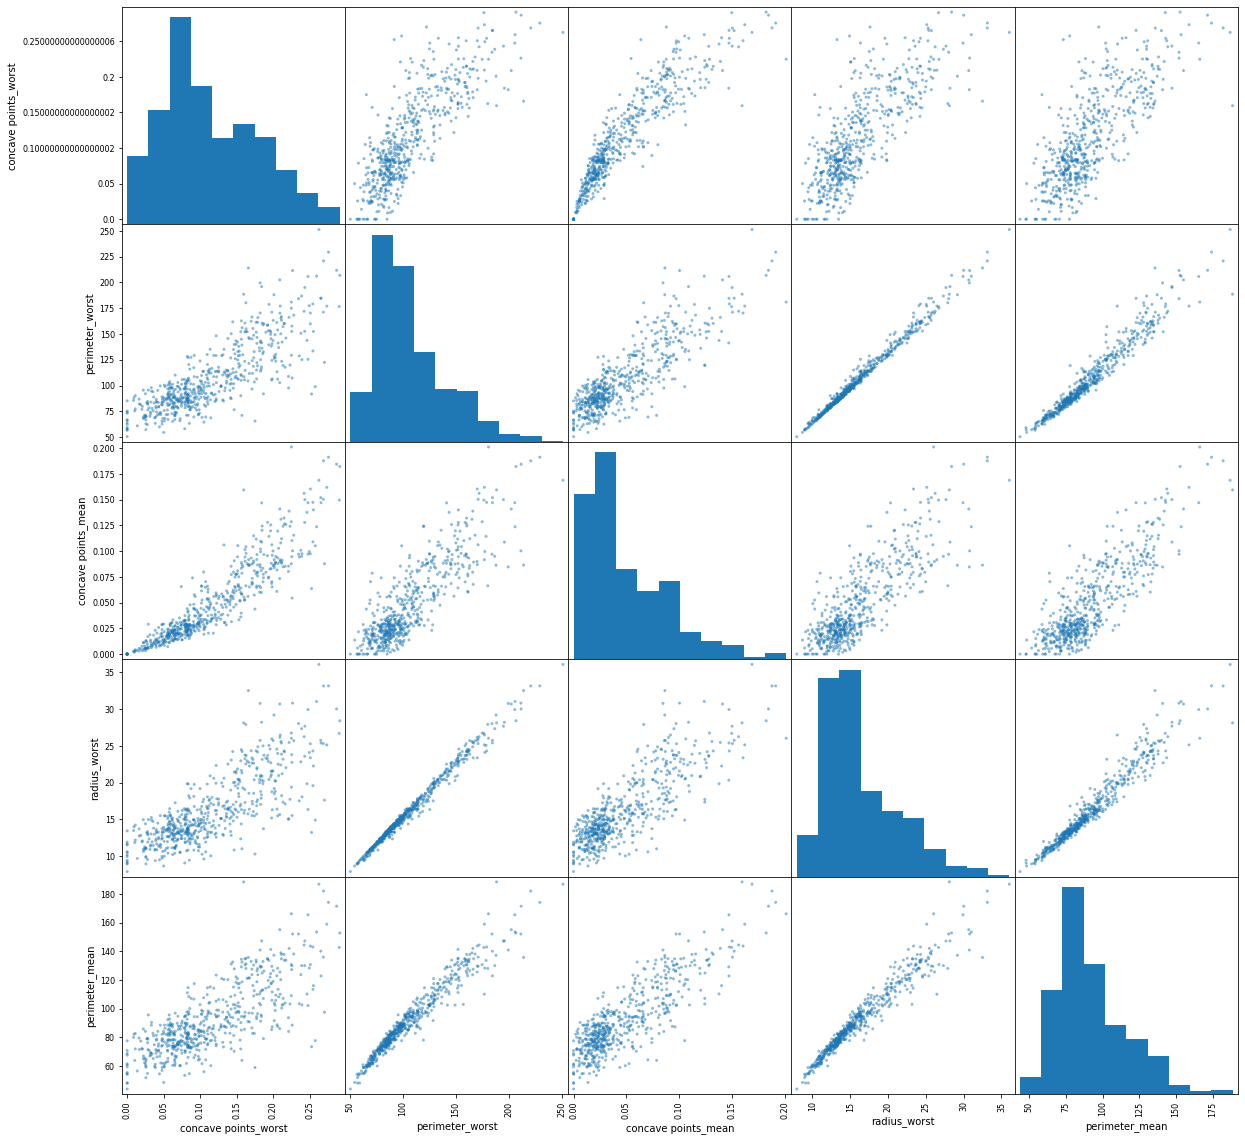

In [208]:
#burada sadece
from pandas.plotting import scatter_matrix
scatter_matrix(data[attributes], figsize=(20, 20));

Bu grafiklere bakarak: Bağımsız değişken ile yüksek ilişkisi bulunan özelliklerin **kendi aralarında da yüksek ilişkiye sahip olduğunu görüüyoruz**. Bu durum, yorumlanabilir bir model arayışında iseniz kabul edilemezdir. Aynı şekilde doğrusal regresyon modelleri için de berbattır. Çünkü... bu değişkenlerin birinin olmaması durumunda değişen pek bir şey olmaz, mesela "kadın olmak" sütunun olduğu verisetinde "erkek olmak" sütunun olmasına gerek yoktur çünkü "erkek olmak" "kadın olmak" ile ifade edilebilir. Bu hem gereksiz fazla özelliktir, hem de, daha önemlisi, dediğim gibi özelliklerin yorumlanabilirliği konusunda büyük sorunalr yaratır. Sağlıklı yorumlar yapılmasına engel olur.  

Bu grafikte yalnızca en ilişkili 5 özelliği çizdirdik. Çünkü tüm özellikleri dahil etseydik 30*30=900 grafik olacaktı, bunu şu an için yapmayalım :)
Ama bir çaresi var, aşağıdaki grafik işimize yarayacaktır:

> ->Alıntı: **"Genel olarak, veri kümenizde ilişkili özelliklere sahip olmaktan kaçınmanız önerilir. Gerçekten de, yüksek oranda ilişkili özelliklerden oluşan bir grup ek bilgi (veya sadece çok az) getirmeyecek, ancak algoritmanın karmaşıklığını artıracak ve böylece hata riskini artıracaktır."**

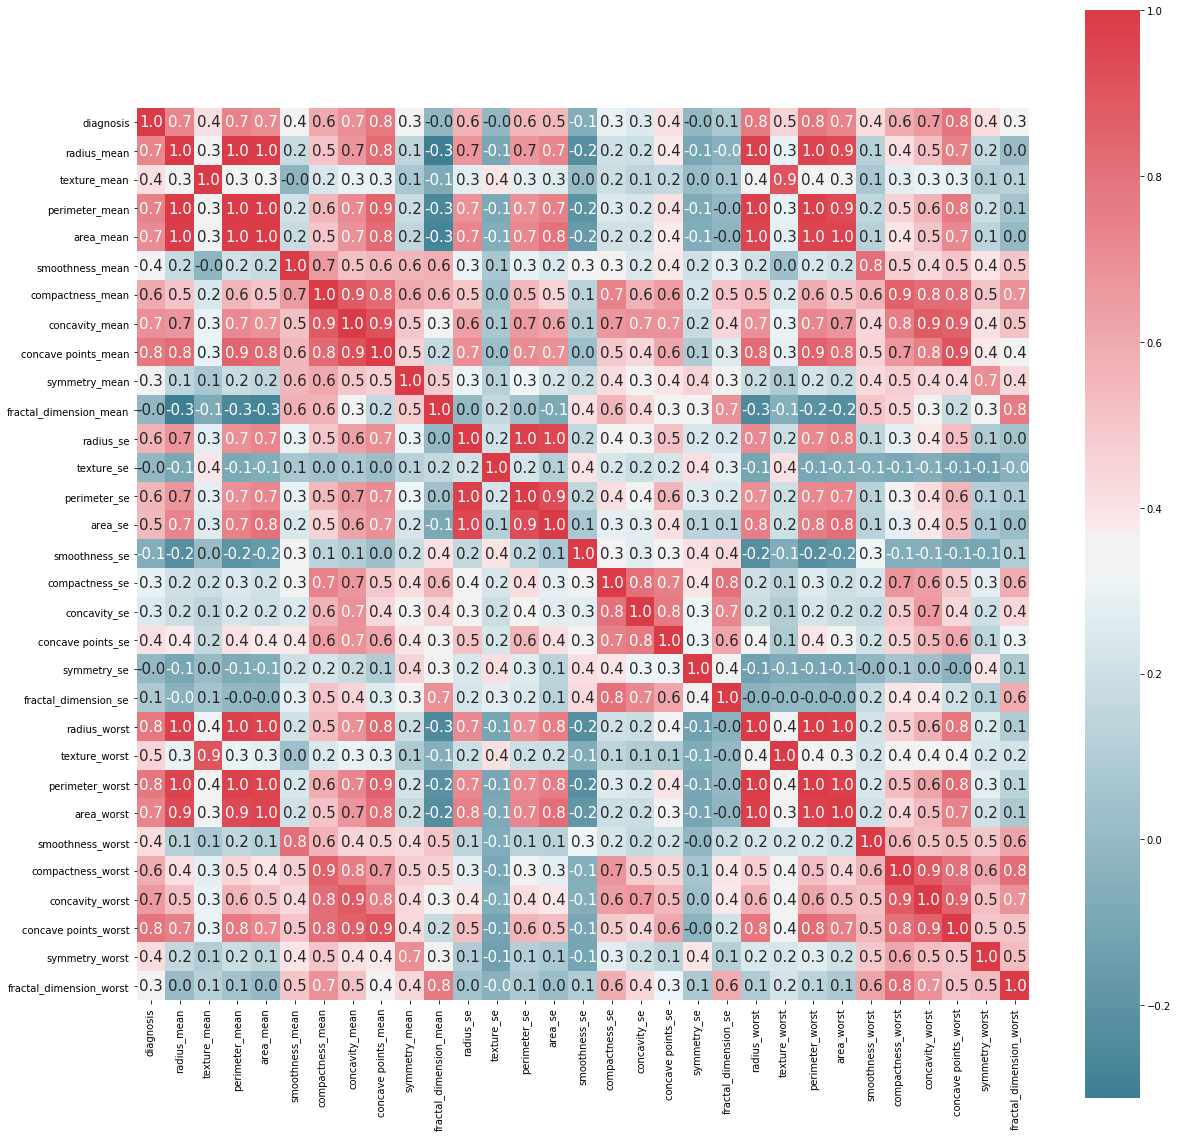

In [209]:
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap=cmap)
plt.show()

Görüleceği gibi burada birkaç tane özelliğin neredeyse "1" korelasyon katsayısına sahip. Bu soruna "Multicollinearity" denir.  Bu sorunu çözmek için farklı yaklaşımlar vardır, Lasso regresyon,  algoritmalarını kullanarak özellik seçilebilir. Hangisinin en mantıklısı olduğu probleme göre değişkenlik gösterecektir. Bununla birlikte Özelliklerin birbiri ile ilişkili olması, yorumlanabilirliği etkilerken, tahmin başarısını pek etkilemez. 

Örneğin, "Erkek olmak" ve "Kadın olmak" gibi birbiri ile tamamen ilişkili olan 2 özelliğin olmsı halinde "cinsiyetin" bağımlı dğeişkene etkisi doğru yorumlanamaz ama tahmin başarısı da çok etkilenmez.

Ben şu an sadece tahmin başarısı ile ilgilendiğim için bu sorunu çözmeyebilirim. Ama yine de bi göz atalım. Yüksek korelasyona sahip değişkenleri çıkarıp, tahmin başarısının değişmediğini gözle görelim: 
Ben önce Random forrest kullanarak değişken seçmek istiyorum. Sonrasında elle yüksek korelasyona sahip değişkenleri çıakracağım. Ama buradan itibaren örnekleri Trian-Test olarak ayırmalıyız.

Test-Train olarak ayırmadan önce, son olarak Kanser-Kanser olmama oranına bir bakalım:

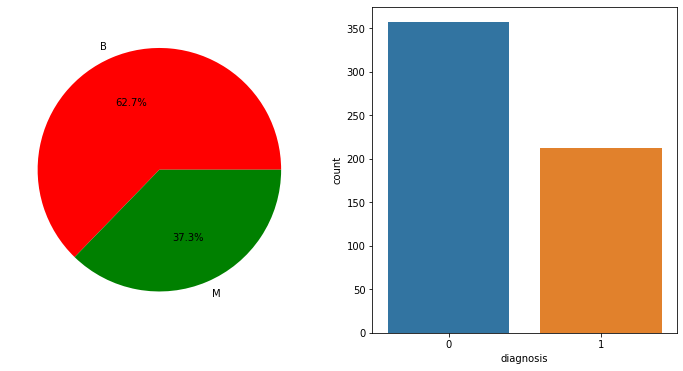

In [210]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
sns.countplot(x='diagnosis', data=data, ax=axes[1])
axes[0].pie(data.diagnosis.value_counts(), colors=["r","g"],autopct='%1.1f%%',labels=['B','M']);

Grafiklere bakarak, kanserli olmama oranının kanserli olmaoranından çok daha yüksek olduğunu görebiliriz.

        Train-Test şeklinde ayırma işini klasik "train_test_split" ile değil, ShuffleSplit ile yapacağız. Çünkü elimizdeki örnek sayısı epey az ve bu yüzden test ve train setlerindeki kanserli/kanserli olmama ornaının yakın olmasını istiyoruz. Aksi halde yanlılık olacaktır. 

In [8]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=.25, random_state=42)
for train_index, test_index in rs.split(data):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]
y_train, X_train =train_set["diagnosis"],train_set.drop(columns=["diagnosis"])
y_test, X_test=test_set["diagnosis"],test_set.drop(columns=["diagnosis"])

In [9]:
len(X_train),len(y_train),len(X_test),len(y_test)

(426, 426, 143, 143)

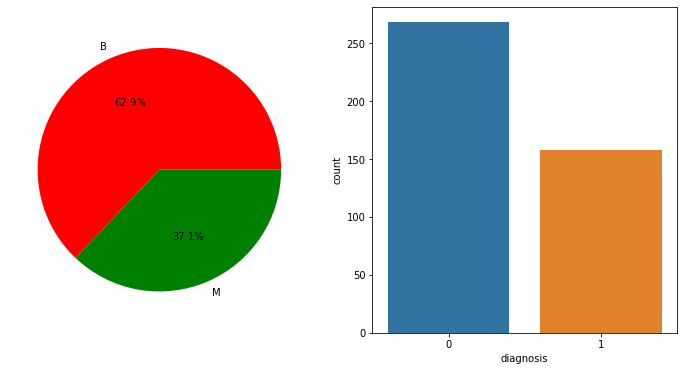

In [213]:
# Eğitim setimizdeki oranların hemen hemen aynı olduğunu görelim:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
sns.countplot(x='diagnosis', data=train_set, ax=axes[1])
axes[0].pie(train_set.diagnosis.value_counts(), colors=["r","g"],autopct='%1.1f%%',labels=['B','M']);

    Şimdi devam edelim: 

Nerede kalmıştık? Birbiri ile ilişkili olan, "fazlalık" olan özelliklerden kurtulacaktık. Bunu 

Görüleceği gibi 426 örenğin olduğu eğitim kümemizin artık 11 özelliği var. 

In [10]:
cor_matrix=X_train.corr().abs()
cor_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.304985,0.997859,0.986400,0.171873,0.471868,0.658938,0.812735,0.177391,0.348605,...,0.968839,0.287815,0.964258,0.941565,0.110836,0.371750,0.517456,0.722498,0.183790,0.049960
texture_mean,0.304985,1.000000,0.311127,0.298170,0.005450,0.231029,0.286955,0.290157,0.124911,0.084633,...,0.336033,0.908229,0.344290,0.322744,0.081379,0.259885,0.275700,0.300805,0.124445,0.071001
perimeter_mean,0.997859,0.311127,1.000000,0.986012,0.208890,0.523521,0.699494,0.842173,0.212157,0.300176,...,0.969018,0.294449,0.970112,0.942806,0.142360,0.415667,0.556278,0.751201,0.205528,0.005723
area_mean,0.986400,0.298170,0.986012,1.000000,0.180526,0.467907,0.672195,0.815792,0.178882,0.315426,...,0.960207,0.274186,0.956815,0.960097,0.118093,0.352042,0.504910,0.700664,0.159445,0.048272
smoothness_mean,0.171873,0.005450,0.208890,0.180526,1.000000,0.679398,0.536711,0.563794,0.542504,0.577921,...,0.220288,0.070951,0.247584,0.216006,0.810488,0.494823,0.465218,0.526425,0.374352,0.522300
compactness_mean,0.471868,0.231029,0.523521,0.467907,0.679398,1.000000,0.877074,0.820703,0.629149,0.560770,...,0.505476,0.251402,0.565101,0.484499,0.579755,0.864267,0.828472,0.813503,0.491430,0.678823
concavity_mean,0.658938,0.286955,0.699494,0.672195,0.536711,0.877074,1.000000,0.921567,0.531922,0.325374,...,0.672535,0.293884,0.717997,0.666532,0.452328,0.739817,0.884771,0.852287,0.396788,0.491342
concave points_mean,0.812735,0.290157,0.842173,0.815792,0.563794,0.820703,0.921567,1.000000,0.495360,0.143710,...,0.825464,0.302525,0.853576,0.808862,0.462725,0.651868,0.765735,0.908551,0.390182,0.340234
symmetry_mean,0.177391,0.124911,0.212157,0.178882,0.542504,0.629149,0.531922,0.495360,1.000000,0.459911,...,0.215499,0.156103,0.251836,0.204603,0.428509,0.511716,0.477076,0.482451,0.688157,0.462935
fractal_dimension_mean,0.348605,0.084633,0.300176,0.315426,0.577921,0.560770,0.325374,0.143710,0.459911,1.000000,...,0.288382,0.056818,0.239222,0.261136,0.504223,0.461030,0.345004,0.170665,0.282858,0.788842


In [11]:
cor_matrix.shape

(30, 30)

Matrisin alt üçgeni üst üçgeni ile aynı değerleri içerdiğinden ve köşegendeki değerler daima 1 olduğundan, sadece alt üçgen matrisi alalım:

In [12]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.304985,0.997859,0.986400,0.171873,0.471868,0.658938,0.812735,0.177391,0.348605,...,0.968839,0.287815,0.964258,0.941565,0.110836,0.371750,0.517456,0.722498,0.183790,0.049960
texture_mean,NaN,NaN,0.311127,0.298170,0.005450,0.231029,0.286955,0.290157,0.124911,0.084633,...,0.336033,0.908229,0.344290,0.322744,0.081379,0.259885,0.275700,0.300805,0.124445,0.071001
perimeter_mean,NaN,NaN,NaN,0.986012,0.208890,0.523521,0.699494,0.842173,0.212157,0.300176,...,0.969018,0.294449,0.970112,0.942806,0.142360,0.415667,0.556278,0.751201,0.205528,0.005723
area_mean,NaN,NaN,NaN,NaN,0.180526,0.467907,0.672195,0.815792,0.178882,0.315426,...,0.960207,0.274186,0.956815,0.960097,0.118093,0.352042,0.504910,0.700664,0.159445,0.048272
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.679398,0.536711,0.563794,0.542504,0.577921,...,0.220288,0.070951,0.247584,0.216006,0.810488,0.494823,0.465218,0.526425,0.374352,0.522300
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.877074,0.820703,0.629149,0.560770,...,0.505476,0.251402,0.565101,0.484499,0.579755,0.864267,0.828472,0.813503,0.491430,0.678823
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921567,0.531922,0.325374,...,0.672535,0.293884,0.717997,0.666532,0.452328,0.739817,0.884771,0.852287,0.396788,0.491342
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495360,0.143710,...,0.825464,0.302525,0.853576,0.808862,0.462725,0.651868,0.765735,0.908551,0.390182,0.340234
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.459911,...,0.215499,0.156103,0.251836,0.204603,0.428509,0.511716,0.477076,0.482451,0.688157,0.462935
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288382,0.056818,0.239222,0.261136,0.504223,0.461030,0.345004,0.170665,0.282858,0.788842


Ve yüksek korelasona sahip değerleri düşürelim: 

In [13]:
to_drop = list([column for column in upper_tri.columns if any(upper_tri[column] > 0.95)])
print(); print(to_drop)


['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


In [14]:
droped_train_data = X_train.drop(columns=to_drop, axis=1)
droped_test_data = X_test.drop(columns=to_drop, axis=1) #bu degiskenlerin test setimizden silinmiş halini de çekelim (tahmin başarısına bakacağımız için. Ama test setinden sadece 
# şu anlık silindiğini, test setinni hala 30 özelliğinin olduğunu unutmayın.)
droped_test_data.shape, droped_train_data.shape, X_test.shape

((143, 23), (426, 23), (143, 30))

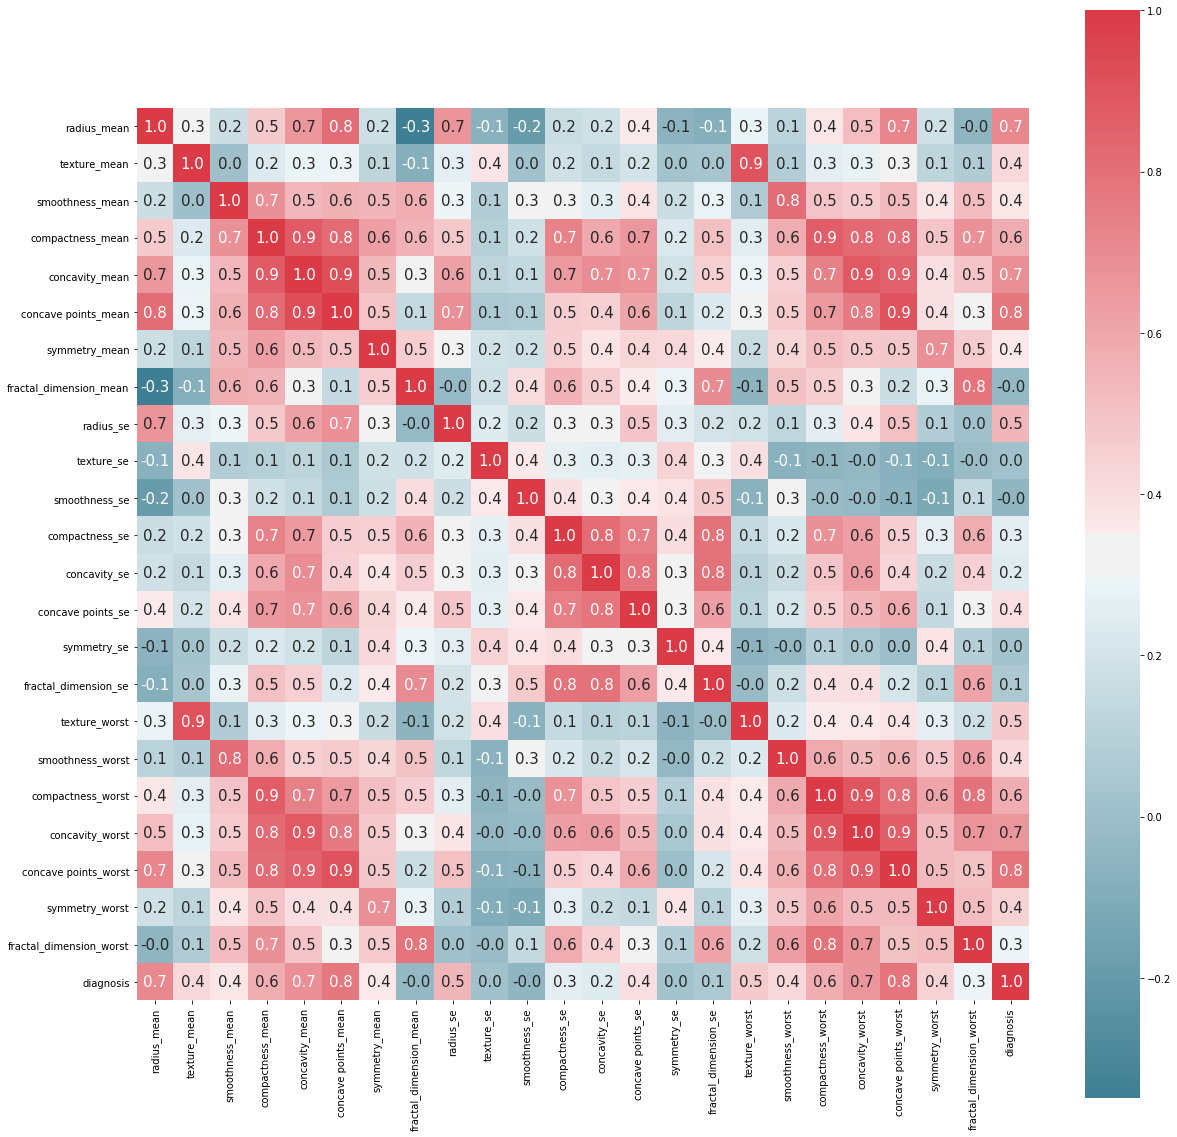

In [219]:
# Özelliklerin kanserli olma olmama durumu ile ilgili korelasyonları: 
droped_train_data["diagnosis"]=y_train # asağıdaki heapmap'i çizdirmek için şunu ekledik.
corr_matrix = droped_train_data.corr()
corr_matrix["diagnosis"].sort_values(ascending=False)
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap=cmap)
plt.show()

Ah evet, artık birbiri ile yüksek oranda ilişkiliözelliklerimizin sayısı daha az. Şimdi, birbiri ile ilişkili özelliklerin düşürüldüğü bu veri seti ile orjinal verisetimizi RandomForrest'a sokalım ve başarı skorumuzda pek bir fark olamdığını görelim:   

    Özelliklerin tamamı dahil olduğundaki başarı skorumuz:

In [16]:
X_train.shape, X_test.shape, droped_train_data.shape, droped_test_data.shape

((426, 30), (143, 30), (426, 23), (143, 23))

#### Orijinal özellikler  ile tahmin Accuracy_score: 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
rf_default=RandomForestClassifier(random_state=42).fit(X_train,y_train)
y_default_pred=cross_val_predict(rf_default, X_train, y_train, cv=10)

accuracy_score(y_train,y_default_pred)

0.960093896713615

#### İlişkili özellikleri düşürülmüş özellikler ile Accuracy_score: 

In [18]:
droped_train_data=droped_train_data.drop(columns='diagnosis', axis=1)

KeyError: "['diagnosis'] not found in axis"

In [19]:
rf_droped_features=RandomForestClassifier(random_state=42).fit(droped_train_data,y_train)
y_dropped_pred=cross_val_predict(rf_droped_features, droped_train_data, y_train, cv=10)
accuracy_score(y_train, y_dropped_pred)

0.9530516431924883

Görüldüğü gibi, özelliklerin neredeyse yarısını kullanmamıza rağmen oluşan fark pek büyük değil. Çalışmamıza devam ederken buradaki **droped_test_data** ve **droped_train_data** 'yı kullanacağız.

In [20]:
droped_test_data.shape, droped_train_data.shape

((143, 23), (426, 23))

>***Bu yüksek ilişkili özelliklerden kurtulmanın bir başka yöntemi ise şudur: | ScikitLearn dokümanı |***

ScikitLearn dokümanı: __"Özellikler eşdoğrusal olduğunda, bir özelliğin permütasyonunun modellerin performansı üzerinde çok az etkisi olacaktır, çünkü ilişkili bir özellikten aynı bilgileri alabilir. Çok Satırlı özellikleri işlemenin bir yolu, Spearman sıra sırası korelasyonları üzerinde hiyerarşik kümeleme yapmak, bir eşik seçmek ve her kümeden tek bir özellik tutmaktır. İlk olarak, ilişkili özelliklerin bir ısı haritasını çiziyoruz:"__


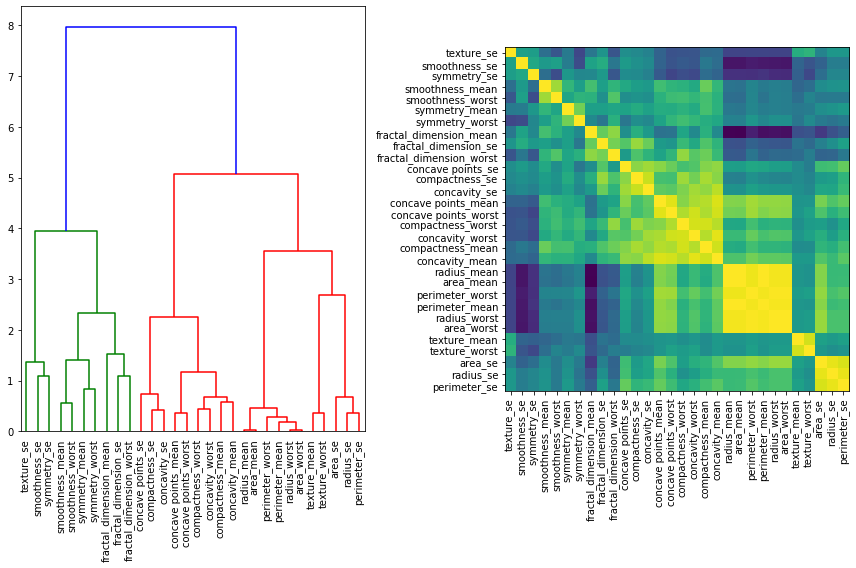

In [225]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=X_train.columns, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()

plt.show()

ScikitLearn dokümanı: __Daha sonra, özelliklerimizi kümeler halinde gruplamak ve her kümeden bir özellik seçmek, veri kümemizden bu özellikleri seçmek ve yeni bir rastgele orman yetiştirmek için dendrogramın görsel olarak incelenmesiyle manuel olarak bir eşik seçiyoruz(1).__

In [21]:
from collections import defaultdict
cluster_ids = hierarchy.fcluster(corr_linkage, 0.8, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train.iloc[:,selected_features]
X_test_sel = X_test.iloc[:,selected_features]

NameError: name 'hierarchy' is not defined

In [22]:
X_train_sel.head(4)

NameError: name 'X_train_sel' is not defined

Artık 30 yerine 14 özelliğimiz var! Yine, yeni özelliklerimizin heapMap'ine bakacak olursak:


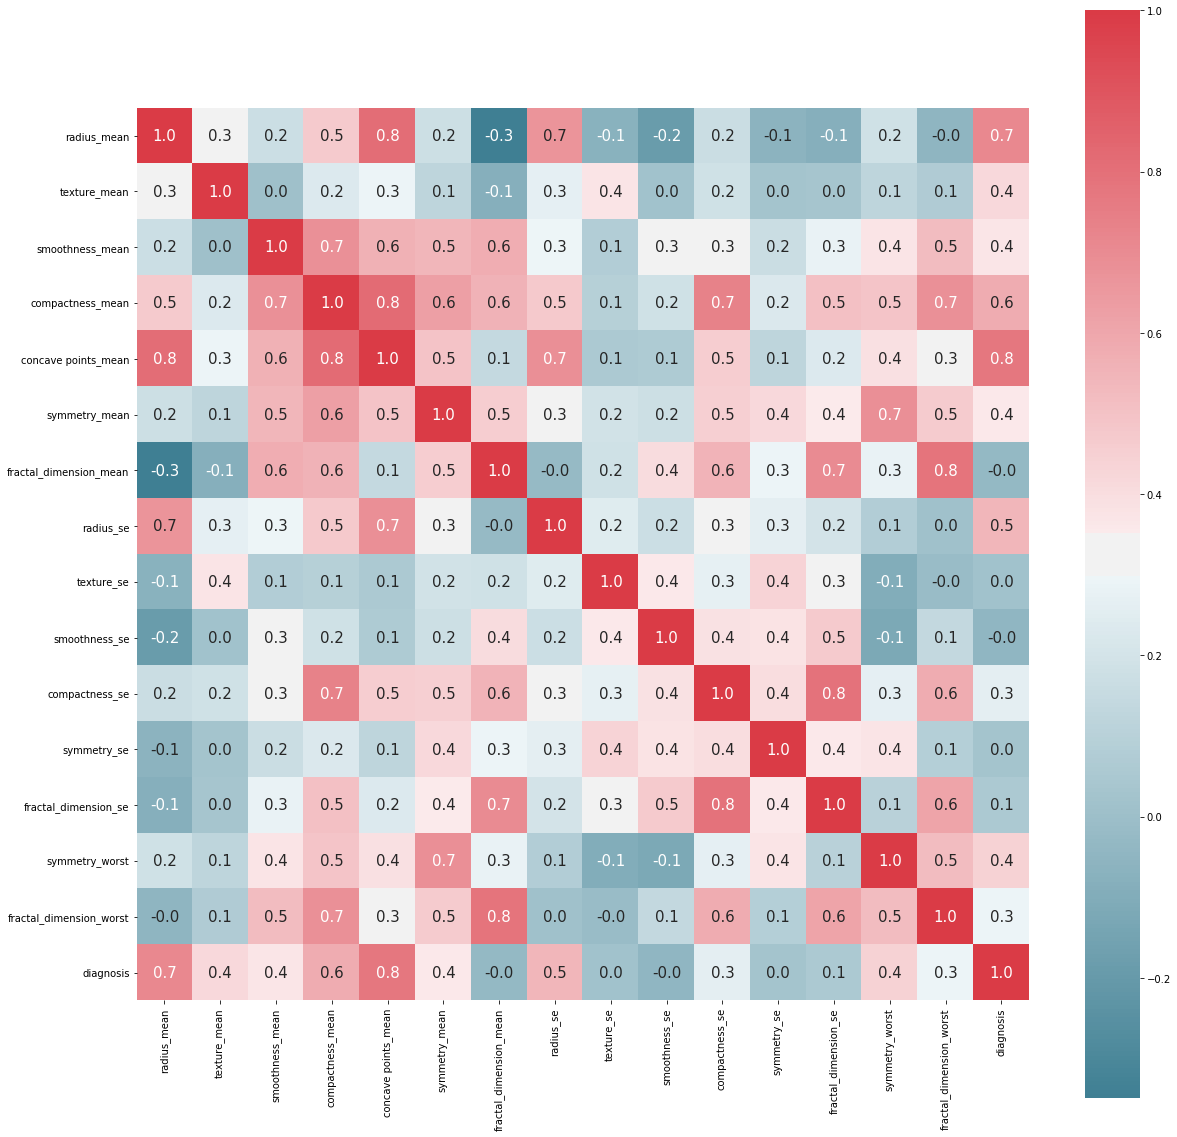

In [228]:
# Özelliklerin kanserli olma olmama durumu ile ilgili korelasyonları: 
X_train_sel["diagnosis"]=y_train # asağıdaki heapmap'i çizdirmek için şunu ekledik.
corr_matrix = X_train_sel.corr()
corr_matrix["diagnosis"].sort_values(ascending=False)
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap=cmap)
plt.show()

Daha az ilişkili özellikleri elde ettik gibi görünüyor. Şimdi accuracy_score undaki değişime bakalım:

#### İlişkili özellikleri düşürülmüş (with 16 features) özellikler ile Accuracy_score: 

In [23]:
X_train_sel=X_train_sel.drop(columns='diagnosis', axis=1)

NameError: name 'X_train_sel' is not defined

In [24]:
X_train_sel.shape

NameError: name 'X_train_sel' is not defined

In [231]:
rf_droped_features=RandomForestClassifier(random_state=42).fit(X_train_sel,y_train)
y_predss=cross_val_predict(rf_droped_features, X_test_sel, y_test, cv=10)
accuracy_score(y_test, y_predss)

0.9370629370629371

Accuracy_skore, %96 dan %93.7'ye kadar düştü ama özelliklerin yalnızca %50'sini kullandık. Ve eğer özelliklerin yorumuna ihtiyacımız olsaydı buna kesinlikle değebilirdi, ne istediğinize bağlı. 

Eğer elimde çok büyük bir veriseti olsaydı, doğru metodu belirleyerek (Şu an yaptığımız şey, PCA, Regularization, problemimize göre değişir) boyutu daha küçük boyutlara indirgememiz şarttı.(Genelde özelliklerin çoğu gereksizdir ve binlerce özelliğin olduğu verisetlerinin zaman maliyetini hesaba katınca  boyutu indirgemek kaçınılmaz olur). 

Şu an için, orijinal veriyi kullanarak devam edeceğim. 

In [232]:
data["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [25]:
svm_clf = SVC(probability=True)
svm_clf.fit(X_train_sel,y_train)
accuracy_score(y_test,svm_clf.predict(X_test_sel))

NameError: name 'SVC' is not defined

In [32]:
def get_scores(X_train_, X_test_,y_train=y_train, y_test=y_test):

    
    
    
    xgb_clf= xgb.XGBClassifier()
    knn_clf=KNeighborsClassifier()
    log_clf = LogisticRegression()
    rnd_clf = RandomForestClassifier()
    svm_clf = SVC(probability=True)
    voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('xgb', xgb_clf), ('knn', knn_clf)],
    voting='soft'
    )
    voting_clf.fit(X_train_, y_train)
    for clf in (log_clf, rnd_clf, svm_clf, xgb_clf, knn_clf, voting_clf):
        
        clf.fit(X_train_, y_train)
        y_pred = clf.predict(X_test_)
        
        predicted = cross_val_predict(clf, X_test_, y_test, cv=10) 
        
        print(clf.__class__.__name__, accuracy_score(y_test, predicted))
    print(X_train_.shape)

In [33]:
get_scores(X_train_=X_train[:10],X_test_=X_test,y_train=y_train[:10])

0.951048951048951
LogisticRegression 0.951048951048951
RandomForestClassifier 0.9440559440559441
SVC 0.951048951048951
XGBClassifier 0.951048951048951
KNeighborsClassifier 0.9370629370629371
VotingClassifier 0.965034965034965
(10, 30)


In [15]:
from xgboost import XGBClassifier
dene=XGBClassifier().fit(X_train,y_train)
predicted = cross_val_predict(dene, X_train, y_train, cv=10) 
print(accuracy_score(y_train, predicted))

0.9671361502347418


## Aykırı gözlem analizi: 

Aykırı gözlemleri burada unun için farklı yollar vardır, PCA, DBSCAN, aracılığı ile de uygulanabilir. Ben burada LocalOutlierFactor'u kullanacağım: 

Aykırı gözlemleri boxplot ile gözlemleyelim. Sınırın dışındaki gözlemler, outlier değerler olara kdeğerlendirilecek.. 

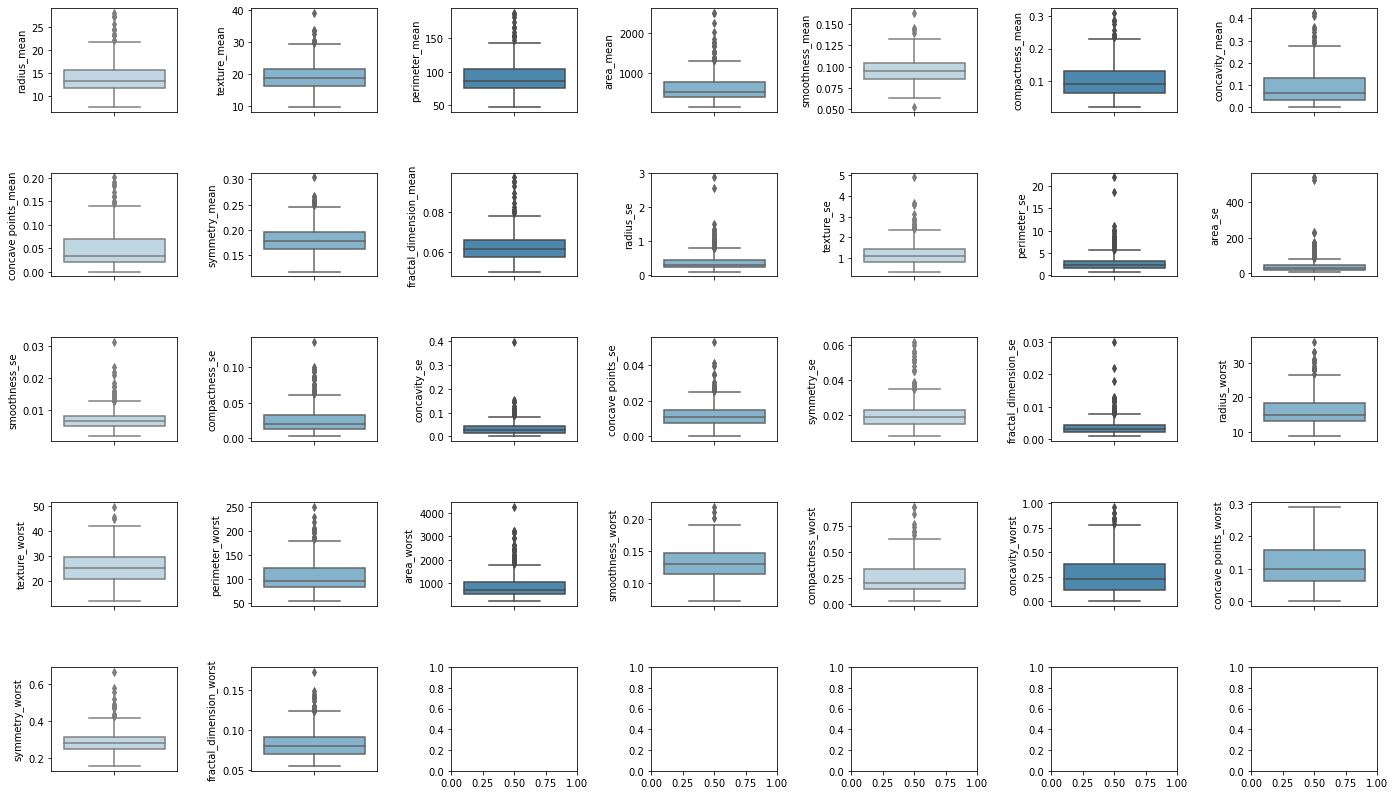

In [236]:
def plotBoxplot(columns, data):
    fig, axes = plt.subplots(ncols=7, nrows=5, figsize=(20,12))
    fig.tight_layout(pad=4.0)

    col = 0
    row = 0
    colors = ['#bad9e9', '#7ab6d6', '#3c8abd','#7ab6d6','#bad9e9', '#3c8abd','#7ab6d6',]


    for i, column in enumerate(columns):
        sns.boxplot(y=column, data=data, ax=axes[row][col], color=colors[col])

        if (i + 1) % 7 == 0:
            row += 1
            col = 0
        else:
            col += 1
plotBoxplot(X_train.columns, X_train)

BoxBlot grafiğinin betimlenmes:

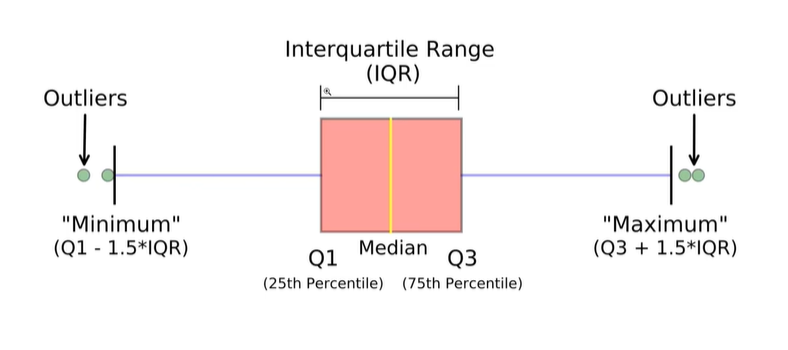

Biraz daha üstüne gidelim. Özel oalrak bir feature seçelim ve oitliers sınırlarını bulmayı bir deneyelim:

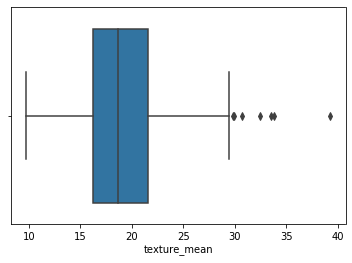

In [237]:
sns.boxplot(x= X_train.texture_mean)

In [238]:
import numpy as np
def outlierLimit(column):
    q1, q3=np.nanpercentile(column, [25, 75])#columnın  %25 ve %75 lik yüzdeliğine gelen kısımları aldık
    IQR=q3-q1 #bu değer standarttır ->Interquartile range
    ust_limit=q3+IQR*1.5 # alt ve üst sınırları aldık. 
    alt_limit=q1-IQR*1.5
    return alt_limit, ust_limit
print(outlierLimit(X_train.texture_mean))

(8.068750000000001, 29.698749999999997)


Evvet! Sınırları doğru bulduk. Öyleyse, her column için bu sınırları tek tek gezip outlier ları bulup, düzenleyebiliriz.

In [239]:
def outliers_to_change(data):
    for col in data.columns:
        col_=data[col]#seçili sütunun dizisini aldık
        alt, ust=outlierLimit(col_)
        col_[col_<alt]=alt #dizide üst sınırdan büyük olanları üst sınıra küçük olanları alt sınıra eşitledik
        col_[col_>ust]=ust
X_test_outliers_done=X_test.copy()
X_train_outliers_done=X_train.copy()

outliers_to_change(X_train_outliers_done) # traindeki outlierslar düzenlendi
outliers_to_change(X_test_outliers_done) # testteki outlierlar düzenlendi

Aykırı değerlerle uğraşmanın bu metoduna **Baskılama** denir.  

Üstte çizdiğimiz boxplot grafiklerini birdaha çizersek artık ayıkırı gözlemlerin olmadığını göreceğiz:

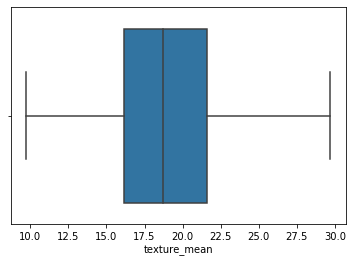

In [246]:
sns.boxplot(x= X_train_outliers_done.texture_mean)

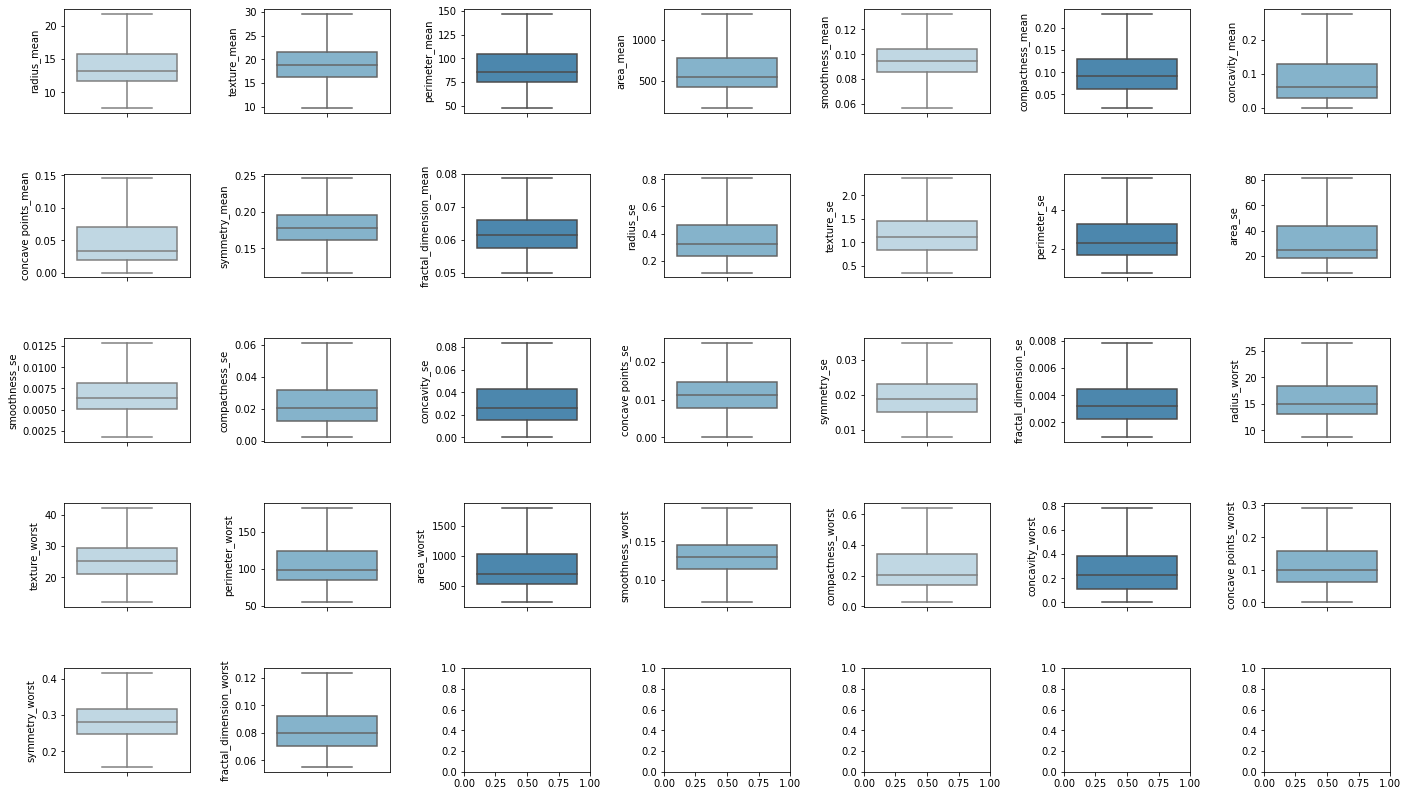

In [245]:
plotBoxplot(X_train_outliers_done.columns, X_train_outliers_done)

In [247]:
get_scores(X_train_outliers_done,X_test_outliers_done)

LogisticRegression 0.951048951048951
RandomForestClassifier 0.9440559440559441
SVC 0.951048951048951
XGBClassifier 0.951048951048951
KNeighborsClassifier 0.9370629370629371
VotingClassifier 0.965034965034965


Neredeyse anyı değerleri elde ettik .d Hatta değerler aynı :) Sanırım elimizdeki veri sınırlı olduğundan ve random state argümanı kullanıdığımız için aynı değerleri üretiyorlar. Devam edelim.


Şimdi, özellikleri scale etmeden önce bir de;
### Çok Değişkenli Aykırı Gözlem Analizi

In [251]:
from sklearn.neighbors import LocalOutlierFactor

In [263]:
clf=LocalOutlierFactor(n_neighbors=15, contamination=0.3)
clf.fit_predict(X_train_outliers_done)[:40]

array([ 1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [267]:
#Şimdi, elimizde her gözlem için skorlar var:
train_scores=clf.negative_outlier_factor_
np.sort(train_scores)[:50]

array([-2.42546453, -2.26802959, -2.09717279, -2.08479203, -2.04622831,
       -2.01931543, -1.9807644 , -1.89583002, -1.87086923, -1.82341838,
       -1.7760169 , -1.74906662, -1.73594966, -1.73275094, -1.71950439,
       -1.64933943, -1.62211078, -1.61786446, -1.61085149, -1.59284225,
       -1.55938052, -1.5343046 , -1.51318539, -1.46439862, -1.45900965,
       -1.41011616, -1.40475686, -1.39598999, -1.39235412, -1.39108497,
       -1.37106702, -1.36758196, -1.35988605, -1.35540563, -1.35079988,
       -1.34584554, -1.33919577, -1.31868126, -1.31750432, -1.30802289,
       -1.30778848, -1.30571538, -1.29724754, -1.29459279, -1.28960857,
       -1.28047725, -1.27361876, -1.26609493, -1.26432236, -1.25598645])

Bir eşik değeri seçip(bu eşik değeri bir kırılımın olduğu nokta olabilir. Örneğin skorlar 10,9,8,3,2,1 şeklinde gidiyorsa 8 ve yukarısı outlier gözlemler olarak seçilebilir.) Bunu daha iyi görmek için bir grafik çizlim:

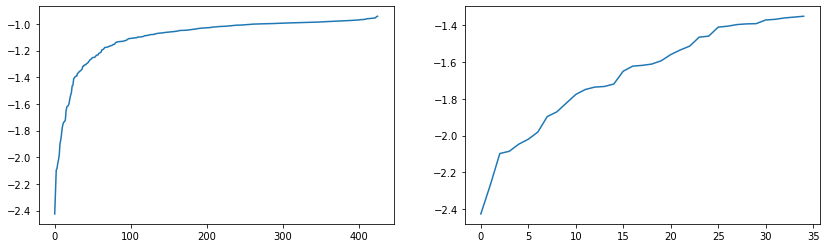

In [283]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14,4))
axes[0].plot(np.sort(train_scores))
axes[1].plot(np.sort(train_scores)[:35])

Grafiğe bakarsak, 2.1, 1.9, 1.4 değerlerinde bir kırılım olduğunu görebiliriz. Seçtiğimiz noktanın üstünü silip, outlierlardan kurtulmuş, outlierlardan etkilenmeyen bir eğitim seti oluşturalım.

In [320]:
esik_deger=np.sort(train_scores)[250] #1.9'U EŞİK OLARAK SEÇTİK.
esik_deger
X_train_outliers_done_done=X_train_outliers_done[train_scores>esik_deger]
y_train_instances=y_train[train_scores>esik_deger]

In [321]:
X_train_outliers_done_done.shape

(175, 30)

In [322]:
get_scores(X_train_outliers_done_done,X_test_outliers_done,y_train=y_train_instances)

LogisticRegression 0.951048951048951
RandomForestClassifier 0.9370629370629371
SVC 0.951048951048951
XGBClassifier 0.951048951048951
KNeighborsClassifier 0.9370629370629371
VotingClassifier 0.965034965034965
(175, 30)


In [ ]:
Yine aynı skorları aldık. 

## Feature scaling:

In [318]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)
get_scores(X_train_scaled,X_test_scaled)

LogisticRegression 0.972027972027972
RandomForestClassifier 0.9440559440559441
SVC 0.958041958041958
XGBClassifier 0.951048951048951
KNeighborsClassifier 0.9440559440559441
VotingClassifier 0.958041958041958
(426, 30)


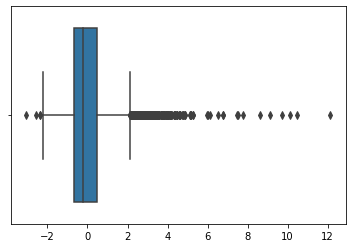

In [244]:
sns.boxplot(x=X_train_scaled)

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb 
from sklearn.svm import SVC
xgb_clf= xgb.XGBClassifier()
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True,kernel="poly")
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('xgb', xgb_clf)],
voting='soft'
)
voting_clf.fit(X_poly_train, y_train)
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, xgb_clf, voting_clf):
    
    clf.fit(X_poly_train, y_train)
    y_pred = clf.predict(X_poly_test)
    
    predicted = cross_val_predict(clf, X_poly_test, y_test, cv=10) 
    
    print(clf.__class__.__name__, accuracy_score(y_test, predicted))

LogisticRegression 0.951048951048951
RandomForestClassifier 0.965034965034965
SVC 0.8881118881118881
XGBClassifier 0.9790209790209791
VotingClassifier 0.972027972027972


In [1037]:
for clf in (log_clf, rnd_clf, svm_clf, xgb_clf, voting_clf):
    clf.fit(droped_train_data, y_train)
    y_pred = clf.predict(droped_test_data)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.965034965034965
RandomForestClassifier 0.951048951048951
SVC 0.916083916083916
XGBClassifier 0.958041958041958
VotingClassifier 0.958041958041958


In [1032]:
rf_droped_features=RandomForestClassifier(random_state=42).fit(droped_train_data,y_train)
y_predss= rf_droped_features.predict(droped_test_data)
accuracy_score(y_test, y_predss)

0.9440559440559441